In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

import seaborn as sns
import random
import cufflinks as cf
cf.go_offline()



/Users/addicted/Desktop/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df_2023_Ask = pd.read_csv('XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv')
df_2023_Bid = pd.read_csv('XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv')

In [4]:
df_2023_Ask.shape

(35220, 6)

In [5]:
df_2023_Ask.head(3)


,Time (UTC),Open,High,Low,Close,Volume
0,2023.01.02 23:00:00,24.102,24.125,24.083,24.125,0.351
1,2023.01.02 23:05:00,24.094,24.188,24.094,24.141,1.155
2,2023.01.02 23:10:00,24.143,24.148,24.022,24.027,0.882


In [6]:
df_2023_Ask.tail(3)

,Time (UTC),Open,High,Low,Close,Volume
35217,2023.06.30 20:45:00,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.776,22.797,22.774,22.786,0.6836
35219,2023.06.30 20:55:00,22.786,22.811,22.786,22.811,0.3712


In [7]:
df_2023_Bid.head(3)

,Time (UTC),Open,High,Low,Close,Volume
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030


In [8]:
df_2023_Bid.tail(3)

,Time (UTC),Open,High,Low,Close,Volume
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.069
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.216
35219,2023.06.30 20:55:00,22.756,22.766,22.701,22.745,0.327


In [9]:
df_2023_Ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [10]:
df_2023_Bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [11]:
df_2023_merged = df_2023_Bid.merge(df_2023_Ask, left_on = 'Time (UTC)', right_on = 'Time (UTC)', how='outer')
df_2023_merged

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [12]:
df_2023_merged.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [13]:
df_2023_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Local time  35220 non-null  object 
 1   Open_Bid    35220 non-null  float64
 2   High_Bid    35220 non-null  float64
 3   Low_Bid     35220 non-null  float64
 4   Close_Bid   35220 non-null  float64
 5   Volume_Bid  35220 non-null  float64
 6   Open_Ask    35220 non-null  float64
 7   High_Ask    35220 non-null  float64
 8   Low_Ask     35220 non-null  float64
 9   Close_Ask   35220 non-null  float64
 10  Volume_Ask  35220 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


In [14]:
df_2023_merged.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,23.357365,23.374611,23.338437,23.357367,8.283187,23.387577,23.404824,23.368703,23.387501,35.095338
std,1.368781,1.368825,1.368926,1.368867,8.976407,1.368779,1.368797,1.368944,1.368861,39.024921
min,19.893000,19.914000,19.888000,19.893000,0.000000,19.923000,19.944000,19.918000,19.923000,0.000000
25%,22.421750,22.440000,22.400000,22.421000,2.611050,22.452000,22.470000,22.430000,22.451000,9.467675
50%,23.560000,23.576000,23.543000,23.560000,5.331100,23.590000,23.607000,23.573000,23.590000,22.237450
75%,24.122000,24.144000,24.103000,24.122000,10.686275,24.153000,24.174000,24.133000,24.152000,46.639375
max,26.118000,26.123000,26.098000,26.118000,120.651700,26.148000,26.153000,26.128000,26.148000,365.632200


In [15]:
df_2023_merged.shape

(35220, 11)

In [16]:
df_2023_merged["Volume_Delta"] = df_2023_merged["Volume_Ask"] - df_2023_merged["Volume_Bid"]
df_2023_merged["Volume_Delta_abs"] = (df_2023_merged["Volume_Ask"] - df_2023_merged["Volume_Bid"]).abs()

df_2023_merged["Open_Delta"] = df_2023_merged["Open_Ask"]  - df_2023_merged["Open_Bid"]
df_2023_merged["High_Delta"] = df_2023_merged["High_Ask"]  - df_2023_merged["High_Bid"]
df_2023_merged["Low_Delta"]  = df_2023_merged["Low_Ask"]   - df_2023_merged["Low_Bid"]
df_2023_merged["Close_Delta"]= df_2023_merged["Close_Ask"] - df_2023_merged["Close_Bid"]

In [17]:
df_2023_merged.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050


In [18]:
df_2023_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Local time        35220 non-null  object 
 1   Open_Bid          35220 non-null  float64
 2   High_Bid          35220 non-null  float64
 3   Low_Bid           35220 non-null  float64
 4   Close_Bid         35220 non-null  float64
 5   Volume_Bid        35220 non-null  float64
 6   Open_Ask          35220 non-null  float64
 7   High_Ask          35220 non-null  float64
 8   Low_Ask           35220 non-null  float64
 9   Close_Ask         35220 non-null  float64
 10  Volume_Ask        35220 non-null  float64
 11  Volume_Delta      35220 non-null  float64
 12  Volume_Delta_abs  35220 non-null  float64
 13  Open_Delta        35220 non-null  float64
 14  High_Delta        35220 non-null  float64
 15  Low_Delta         35220 non-null  float64
 16  Close_Delta       35220 non-null  float6

<Figure size 1200x500 with 0 Axes>

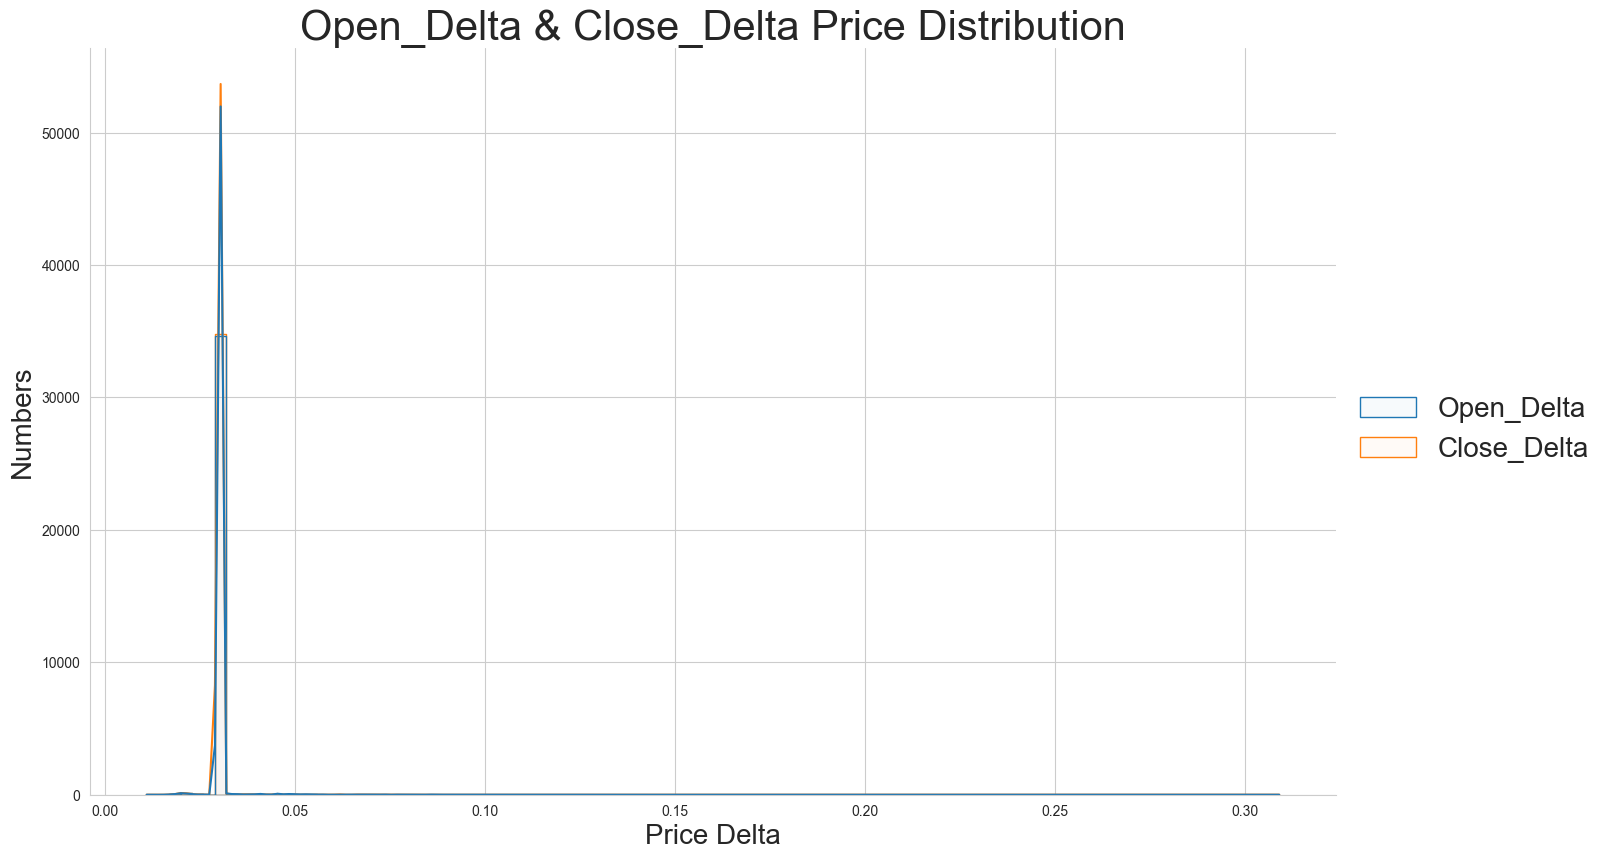

In [21]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            df_2023_merged[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('Open_Delta & Close_Delta Price Distribution')
plt.xlabel('Price Delta', size= 20)
plt.ylabel('Numbers', size= 20)
plt.show()

In [ ]:
#Open and close delta when small calm day, when small large stressfful day, when  large small, started nervous but an agreement was reached

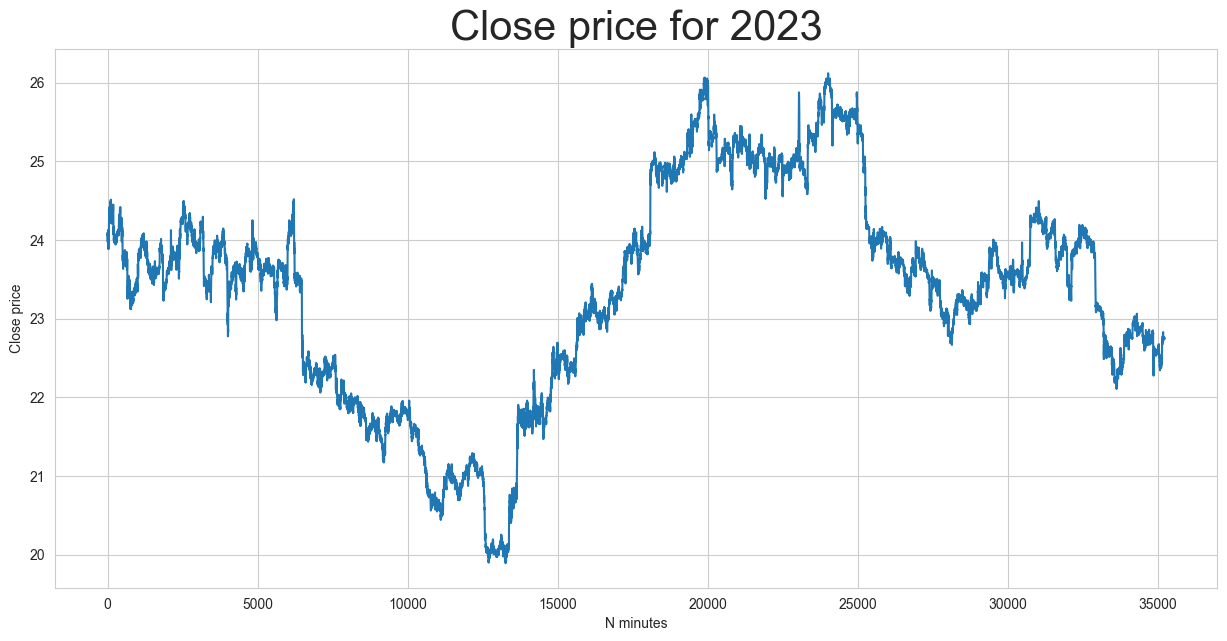

In [22]:
plt.figure(figsize=(15,7))
plt.plot(df_2023_merged['Close_Bid'])
plt.title('Close price for 2023')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

In [ ]:
# We will predict the Highest and Lowest prices DURING the next 5 minutes. 

# To do this in the data output (vector of answers), we shift prices sequentially to 5 minutes up, 
# and find max and min prices during these 5 minutes
# Then you need to delete the 5 last rows since there are no prices for the next 5 minutes. 
# Therefore, we will create an array of answers "data_ay" with the Highest and Lowest prices shifted sequentially to 5 rows up.

In [16]:
#Update the date 

In [23]:
import datetime


In [24]:
df_2023_merged['Local_time_T'] = pd.to_datetime(df_2023_merged['Local time'], utc=True)

In [25]:
df_2023_merged=df_2023_merged.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask'], axis=1)

In [26]:
data = df_2023_merged.drop(['Local time'], axis=1)

In [27]:
data.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T
0,24.036,24.059,24.017,24.059,0.3480,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00
1,24.064,24.130,24.064,24.092,1.8458,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049,2023-01-02 23:05:00+00:00
2,24.094,24.098,23.972,23.977,0.9030,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050,2023-01-02 23:10:00+00:00


data.info()

<html> <h3 style="font-style:italic; color:blue;"> Data Visualization </h3> </html>

## Candlestick chart


In [28]:

candle_data_chart = data.set_index('Local_time_T', inplace=False)

In [29]:
candle_data_chart = candle_data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                        'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)

In [30]:
candle_data_chart.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35220 entries, 2023-01-02 23:00:00+00:00 to 2023-06-30 20:55:00+00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_Bid    35220 non-null  float64
 1   High_Bid    35220 non-null  float64
 2   Low_Bid     35220 non-null  float64
 3   Close_Bid   35220 non-null  float64
 4   Volume_Bid  35220 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


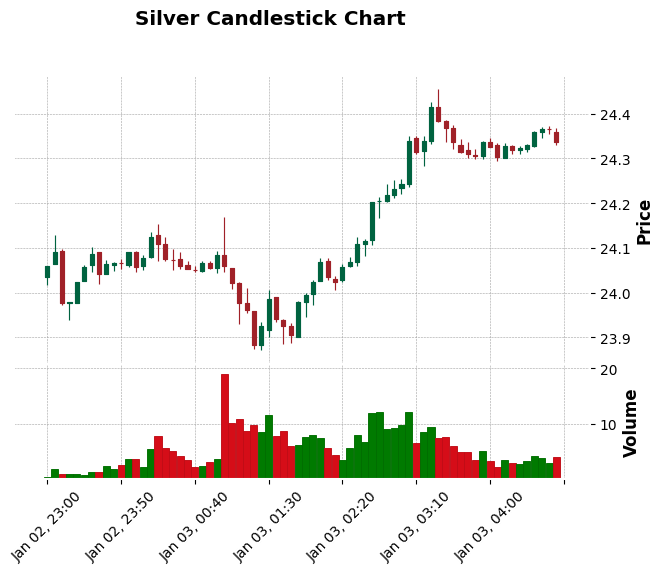

In [31]:
import mplfinance as mpf

candle_data_chart.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
mpf.plot(candle_data_chart.iloc[0:70], type='candle', style='charles', title='Silver Candlestick Chart', volume=True)

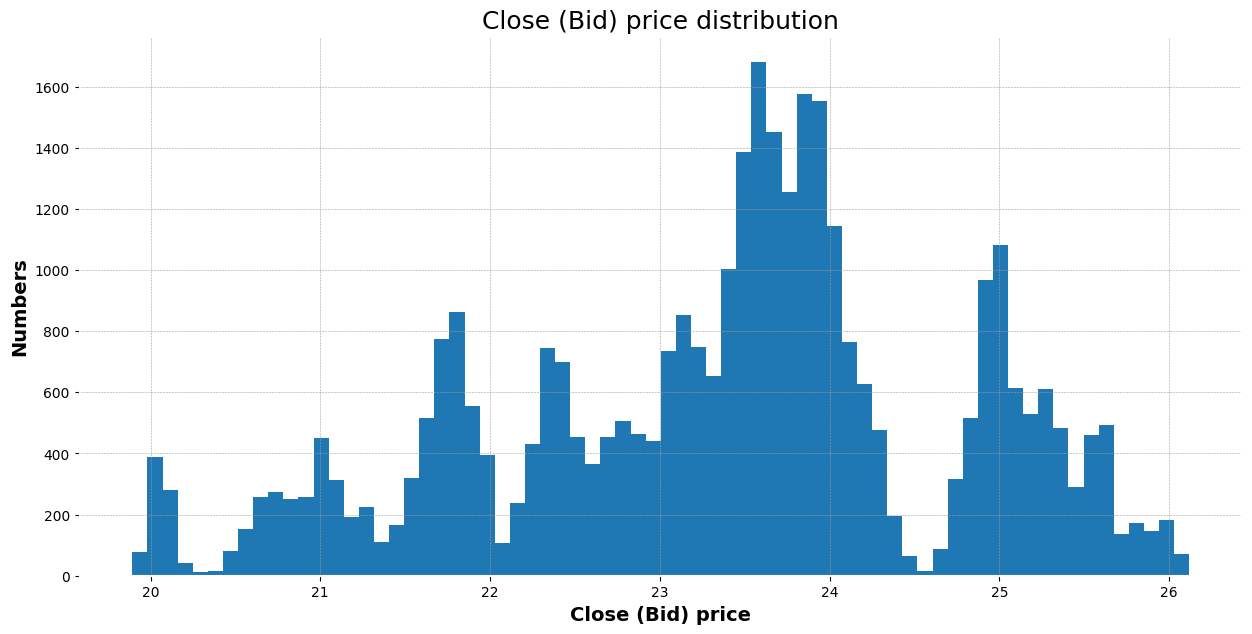

In [32]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Close_Bid'],bins=70)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14);
plt.show()

In [33]:
data['Y_High_Bid'] = data['High_Bid']
data['Y_Low_Ask'] = data['Low_Bid'] + data['Low_Delta']

data = data.drop(['Local_time_T'],axis=1)

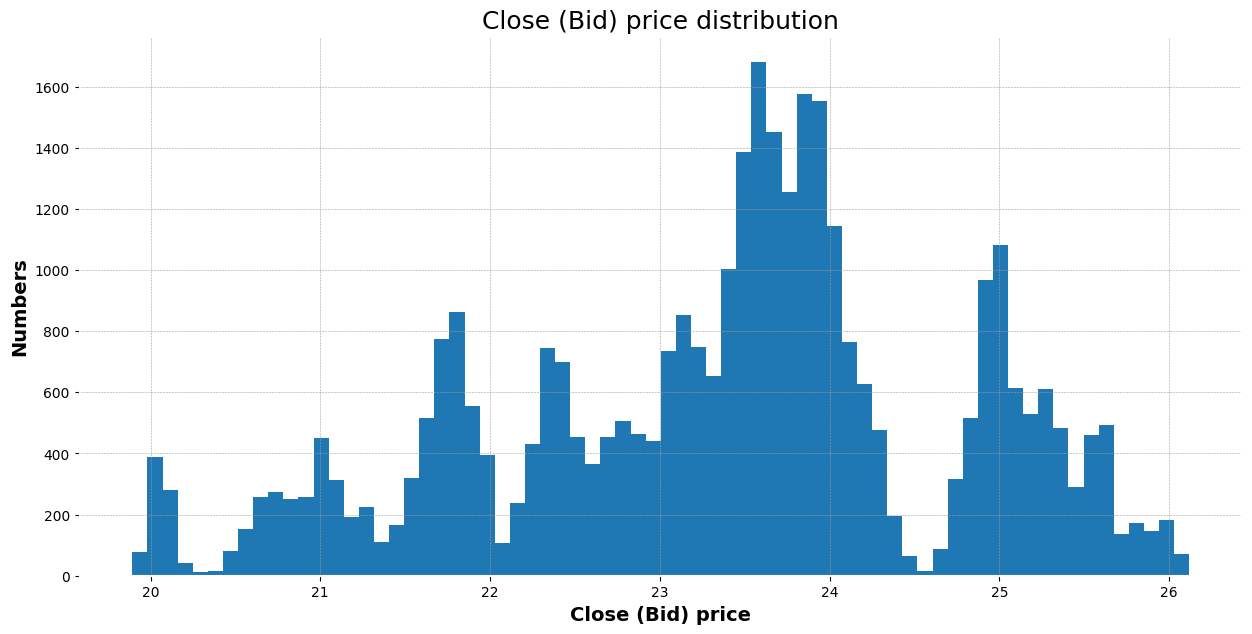

In [34]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Close_Bid'],bins=70)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14);
plt.show()

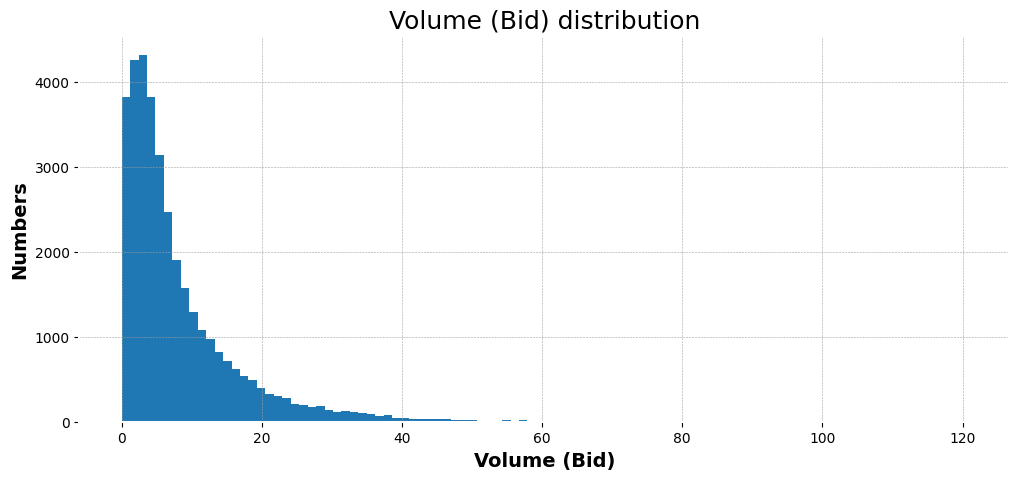

In [35]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14);
plt.show()

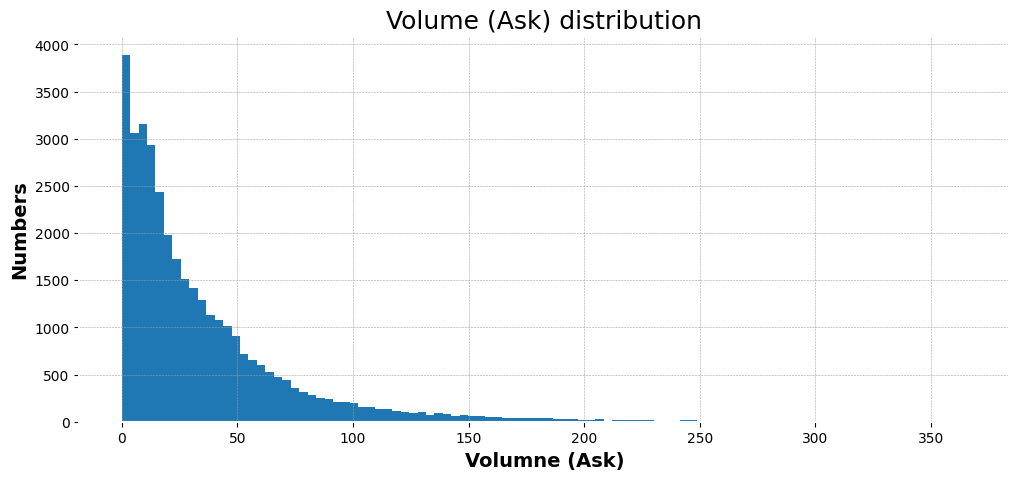

In [36]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Volume (Ask) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volumne (Ask)',size=14);
plt.show()

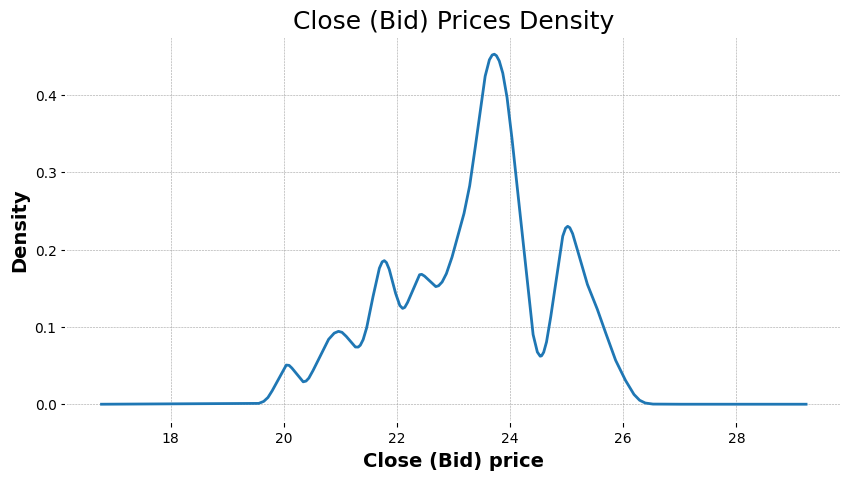

In [37]:
plt.figure(num=1, figsize=(10,5))
data['Close_Bid'].plot.kde()
plt.title('Close (Bid) Prices Density', size=18)
plt.ylabel('Density', size=14)
plt.xlabel('Close (Bid) price', size=14)
plt.show()

In [38]:
vol_350k = data[ (data['Volume_Bid'] > 0.35) | (data['Volume_Ask'] > 0.35)] 

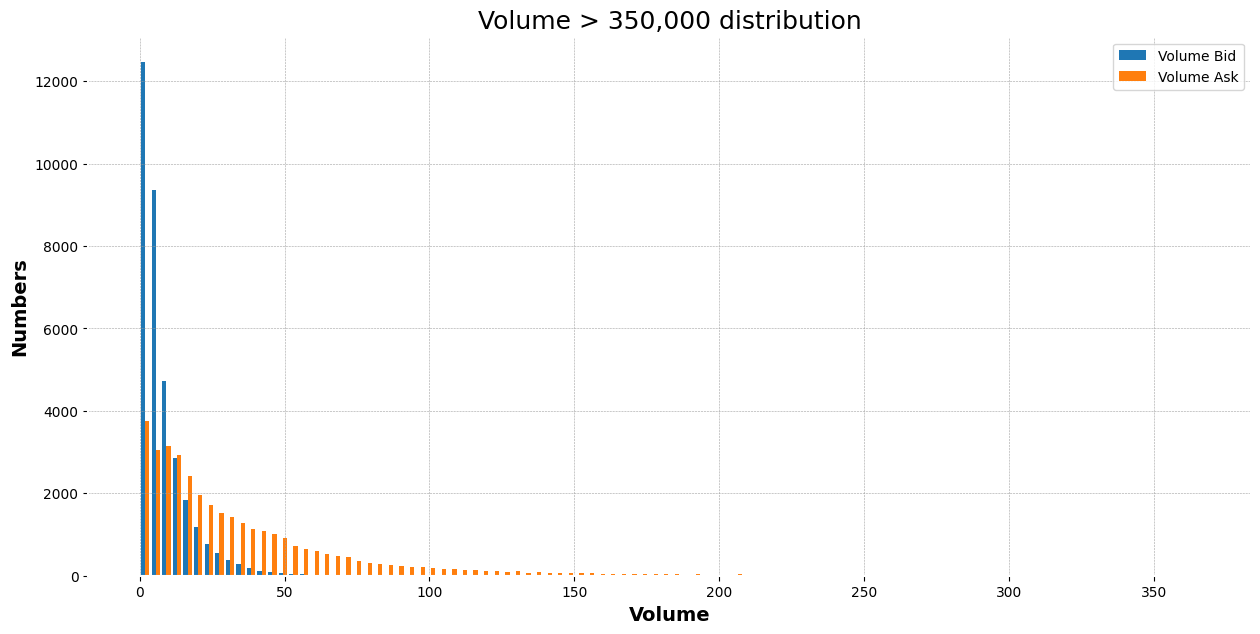

In [39]:
plt.figure(num=1, figsize=(15,7))

plt.hist(vol_350k[['Volume_Bid', 'Volume_Ask']], bins=100)
plt.legend(['Volume Bid', 'Volume Ask'])
plt.title('Volume > 350,000 distribution', size=18)
plt.ylabel('Numbers', size=14)
plt.xlabel('Volume', size=14)
plt.show()

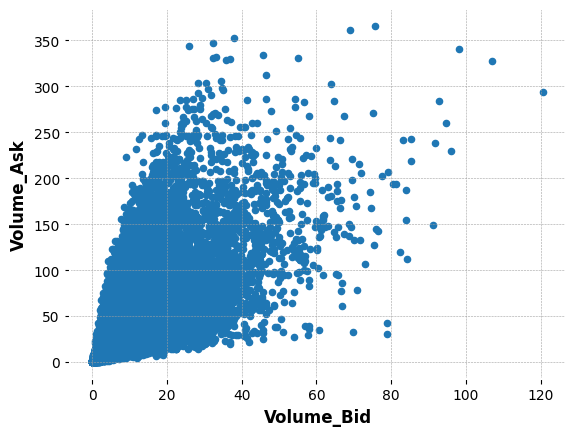

In [40]:
vol_350k.plot.scatter(x='Volume_Bid', y='Volume_Ask')
plt.show()

<html> <h2 style="font-style:italic; color:blue;"> Data Normalisation </h2> </html>

## Train / Validation / Test Split
- Will use:
   80% of data for training, 
   10% of data for validation, 
   10% of data for testing

In [41]:
data_len = len(data)
data_len

35220

In [42]:
training_size = int(round(data_len * 0.8, -3))
training_size

28000

In [43]:
train = data.iloc[:training_size]
train.shape

(28000, 14)

<html> <h4 style="font-style:italic; color:blue;"> Find Max and Min for Prices, Volumes and Deltas </h4> </html>

In [ ]:


# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

# Max_Delta = Max{Open_Delta, High_Delta, Low_Delta, Close_Delta}
# Min_Delta = Min{Open_Delta, High_Delta, Low_Delta, Close_Delta}

In [44]:
max_price = (train['High_Bid'] + train['High_Delta']).max()
max_price

26.153

In [45]:
min_price = train['Low_Bid'].min()
min_price

19.888

In [46]:
max_volume = max(max(train['Volume_Bid']),max(train['Volume_Ask']))
max_volume

365.6322

In [47]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta = round(max_Delta, 3)
max_Delta

0.309

In [48]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta = round(min_Delta, 3)
min_Delta

0.001

In [49]:
max_volume_Delta = train['Volume_Delta'].max()
max_volume_Delta

317.5858

In [50]:
min_volume_Delta = train['Volume_Delta'].min()
min_volume_Delta

-48.7912

In [51]:
max_volume_Delta_abs = train['Volume_Delta_abs'].max()
max_volume_Delta_abs

317.5858

In [52]:
min_volume_Delta_abs = train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [53]:
data['Open_Bid'] = ( data['Open_Bid'] - min_price ) / (max_price-min_price)
data['High_Bid']  = ( data['High_Bid']  - min_price ) / (max_price-min_price)
data['Low_Bid']   = ( data['Low_Bid']   - min_price ) / (max_price-min_price)
data['Close_Bid'] = ( data['Close_Bid'] - min_price ) / (max_price-min_price)
data['Y_High_Bid'] = ( data['Y_High_Bid'] - min_price ) / (max_price-min_price)
data['Y_Low_Ask']  = ( data['Y_Low_Ask']  - min_price ) / (max_price-min_price)

In [54]:
data['Volume_Ask']  = data['Volume_Ask'] / max_volume
data['Volume_Bid']  = data['Volume_Bid'] / max_volume

In [55]:
data['Volume_Delta'] = ( data['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [56]:
data['Volume_Delta_abs']  = data['Volume_Delta_abs'] / max_volume_Delta_abs

In [57]:
data['Open_Delta']  = ( max_Delta - data['Open_Delta'] )  / (max_Delta-min_Delta)
data['High_Delta']  = ( max_Delta - data['High_Delta'] )  / (max_Delta-min_Delta)
data['Low_Delta']   = ( max_Delta - data['Low_Delta'] )   / (max_Delta-min_Delta)
data['Close_Delta'] = ( max_Delta - data['Close_Delta'] ) / (max_Delta-min_Delta)

In [58]:
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
0,0.662091,0.665762,0.659058,0.665762,0.000952,0.000960,0.133180,0.000009,0.788961,0.788961,0.788961,0.788961,0.665762,0.669593
1,0.666560,0.677095,0.666560,0.671030,0.005048,0.003159,0.131287,0.002175,0.905844,0.814935,0.905844,0.844156,0.677095,0.671349
2,0.671349,0.671987,0.651875,0.652674,0.002470,0.002412,0.133115,0.000066,0.844156,0.840909,0.840909,0.840909,0.671987,0.659856
3,0.652674,0.653152,0.646449,0.653152,0.002445,0.002445,0.133172,0.000000,0.844156,0.847403,0.847403,0.847403,0.653152,0.654110
4,0.652833,0.660176,0.652514,0.660016,0.002429,0.002474,0.133217,0.000052,0.847403,0.844156,0.850649,0.840909,0.660176,0.660016


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
 12  Y_High_Bid        35220 non-null  float64
 13  Y_Low_Ask         35220 non-null  float64
dtypes: float64(14)
memory usage: 3.8 MB


In [ ]:
# We will predict the Highest and Lowest prices DURING the next 25 minutes. 

# To do this in the data output (vector of answers), we shift prices sequentially to 5 minutes up, 
# and find max and min prices during these 5 minutes
# Then you need to delete the 5 last rows since there are no prices for the next 5 minutes. 
# Therefore, we will create an array of answers "data_ay" with the Highest and Lowest prices shifted sequentially to 5 rows up.

In [60]:
np.random.seed(20)

In [61]:
o=data.shape[0]
o

35220

In [62]:
p=data.shape[1]
p

14

In [63]:
data_ay = data[['Y_High_Bid', 'Y_Low_Ask']]

In [64]:
data_ay.shape

(35220, 2)

In [65]:
#we shift by 25-minutes(one-row) up
data_ay = data_ay.shift(-5)

In [66]:
# #create the input dataframe
data_ax = data.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

# create new colomns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 5 minutes

# # Forward-looking window
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

In [67]:
#create the input dataframe
# data_ay = data[['Y_High_Bid_5', 'Y_High_Bid_5']]

In [67]:
data_ay

,Y_High_Bid,Y_Low_Ask
0,0.666081,0.667997
1,0.672466,0.670710
2,0.670870,0.666241
3,0.667837,0.667837
4,0.667199,0.668795
...,...,...
35215,NaN,NaN
35216,NaN,NaN
35217,NaN,NaN
35218,NaN,NaN


In [68]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
35210,0.457143,0.460176
35211,0.456983,0.460814
35212,0.456983,0.460974
35213,0.458579,0.460654
35214,0.459377,0.462570
35215,NaN,NaN
35216,NaN,NaN
35217,NaN,NaN
35218,NaN,NaN
35219,NaN,NaN


In [69]:
data_ay['Y_High_Bid_5'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_5']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

In [70]:
data_ax

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,0.662091,0.665762,0.659058,0.665762,0.000952,0.000960,0.133180,0.000009,0.788961,0.788961,0.788961,0.788961
1,0.666560,0.677095,0.666560,0.671030,0.005048,0.003159,0.131287,0.002175,0.905844,0.814935,0.905844,0.844156
2,0.671349,0.671987,0.651875,0.652674,0.002470,0.002412,0.133115,0.000066,0.844156,0.840909,0.840909,0.840909
3,0.652674,0.653152,0.646449,0.653152,0.002445,0.002445,0.133172,0.000000,0.844156,0.847403,0.847403,0.847403
4,0.652833,0.660176,0.652514,0.660016,0.002429,0.002474,0.133217,0.000052,0.847403,0.844156,0.850649,0.840909
...,...,...,...,...,...,...,...,...,...,...,...,...
35215,0.457143,0.457143,0.455387,0.456185,0.000753,0.004924,0.137334,0.004802,0.905844,0.905844,0.905844,0.905844
35216,0.454589,0.456983,0.454589,0.456185,0.000386,0.002070,0.134853,0.001939,0.876623,0.905844,0.876623,0.905844
35217,0.456983,0.456983,0.456185,0.456185,0.000189,0.001152,0.134133,0.001109,0.905844,0.905844,0.905844,0.905844
35218,0.456185,0.458579,0.454589,0.457781,0.000591,0.001870,0.134448,0.001472,0.905844,0.886364,0.879870,0.905844


In [78]:
# delete the last rows
data_ay = data_ay.iloc[:-5]
data_ax = data_ax.iloc[:-5]

In [81]:
data_ay.shape

(35210, 4)

In [82]:
data_ax.shape

(35210, 12)

In [83]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


data_a:
[[6.6209e-01 6.6576e-01 6.5906e-01 6.6576e-01 9.5178e-04 9.5998e-04
  1.3318e-01 9.4463e-06 7.8896e-01 7.8896e-01 7.8896e-01 7.8896e-01]
 [6.6656e-01 6.7709e-01 6.6656e-01 6.7103e-01 5.0482e-03 3.1589e-03
  1.3129e-01 2.1752e-03 9.0584e-01 8.1494e-01 9.0584e-01 8.4416e-01]]


[[0.4581 0.46   0.4568 0.4579 0.0265 0.0572 0.1637 0.0353 0.9058 0.9058
  0.9058 0.9058]
 [0.4592 0.4592 0.4565 0.4576 0.0121 0.0144 0.1355 0.0027 0.9058 0.9058
  0.9058 0.9058]]
numpy size: =  (35210, 12)
type:  float64


In [84]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0.6660814  0.66799681 0.67246608 0.66624102]
 [0.67246608 0.6707103  0.67246608 0.66624102]
 [0.67086991 0.66624102 0.67102953 0.66624102]]


[[0.45730247 0.45969673 0.45730247 0.45810056]
 [0.45634477 0.45810056 0.45714286 0.45810056]
 [0.45714286 0.45985634 0.45857941 0.45985634]]
numpy size: =  (35210, 4)
type:  float64


<html> <h3 style="font-style:italic; color:blue;"> Create the 3D inputs tensor, and 2D outputs matrix </h3> </html>

In [ ]:
# n_small = 30000 rows 

# We need a three-dimensional data tensor: [(n_small-N ), N, 12] and
# two-dimensional array of answers [(n_small-N ), 2] with the High and Low prices DURING the next 25 minutes

# where N=50 is the number of minutes for analysis at each step; those are looking backwards 

# Therefore, we need:
# three-dimensional data tensor of sliced graphs [(n_small - N - 1), N, 12] and
# two-dimensional matrix of answers Y[(n_small - N - 1), 2] with the High and Low prices shifted sequentially to 5 rows up.

In [85]:
from tqdm import tqdm


In [86]:
n_small = 30000
n_small

30000

In [87]:
N=50

L=n_small-N
t=data_a.shape[1]
print('Size of a three-dimensional inputs tensor: ',L,N,t)

Size of a three-dimensional inputs tensor:  29950 50 12


In [88]:
# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [89]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 25 minutes

Y = np.zeros((L, 2), dtype= 'float32') # We will predict two prices - normalised High_Bid and normalised Low_Ask

In [90]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 

#print('L = n - N = ', n-N, L)
print('L = n_small - N - 1 = ', n_small-N-1, L)
#for k in tqdm(range(L-1)):
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid - max 25 minutes future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask -  min 25 minutes future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 1 =  29949 29950


100%|█████████████████████████████████| 29950/29950 [00:00<00:00, 658358.47it/s]

29949
data_b: 
 [[[0.66209096 0.6657622  0.6590583  ... 0.78896105 0.78896105 0.78896105]
  [0.66656023 0.677095   0.66656023 ... 0.8149351  0.90584415 0.84415585]
  [0.67134875 0.67198724 0.6518755  ... 0.84090906 0.84090906 0.84090906]
  ...
  [0.69114125 0.6964086  0.6901836  ... 0.90584415 0.90584415 0.90584415]
  [0.6936951  0.6970471  0.6914605  ... 0.91883117 0.90584415 0.90584415]
  [0.6952913  0.7122107  0.694174   ... 0.90584415 0.90584415 0.90584415]]

 [[0.66656023 0.677095   0.66656023 ... 0.8149351  0.90584415 0.84415585]
  [0.67134875 0.67198724 0.6518755  ... 0.84090906 0.84090906 0.84090906]
  [0.6526736  0.6531524  0.64644855 ... 0.8474026  0.8474026  0.8474026 ]
  ...
  [0.6936951  0.6970471  0.6914605  ... 0.91883117 0.90584415 0.90584415]
  [0.6952913  0.7122107  0.694174   ... 0.90584415 0.90584415 0.90584415]
  [0.7114126  0.7122107  0.7056664  ... 0.90584415 0.90584415 0.90584415]]

 [[0.67134875 0.67198724 0.6518755  ... 0.84090906 0.84090906 0.84090906]
  [0.6

In [92]:
# Control of the correctness of filling the array Y 
# (should show MAX of the normalised prices High_Bid and Low_Ask - during 5 next minutes(step) ahead)


import random

pp = random.randint(50, L) # (any number before 29950) - just to look at the middle of data_b
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  4441
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
0.5865922 		 0.59090185
0.5905826 		 0.5912211
0.59345573 		 0.5896249
0.5905826 		 0.5865922
0.59297687 		 0.58068633
0.59090185 		 0.5792498
0.5912211 		 0.5794094
0.5896249 		 0.57573825
0.5865922 		 0.567917
0.58068633 		 0.5717478
0.5792498 		 0.57414204
0.5794094 		 0.5735036
0.57573825 		 0.57573825
0.567917 		 0.5747805
0.5717478 		 0.5765363


<html> <h3 style="font-style:italic; color:blue;"> Create and train neural network </h3> </html>

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, shuffle = False, stratify = None, random_state=101) 

In [95]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26955, 50, 12)
(26955, 2)
(2995, 50, 12)
(2995, 2)


In [96]:
model = keras.Sequential(
    [
        keras.layers.LSTM(100, activation='relu', input_shape=(50,12)),
        keras.layers.Dense(2)
    ]
)

/Users/addicted/Desktop/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [97]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,402 (177.35 KB)

 Trainable params: 45,402 (177.35 KB)

 Non-trainable params: 0 (0.00 B)

None


In [98]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [99]:
# Early Stopping parameters

es = EarlyStopping(monitor='val_loss', mode='min', patience=6, verbose=1)
mc = ModelCheckpoint('best_model_LSTM_EURGBP.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [100]:
history = model.fit(X_train, y_train, batch_size=20, epochs=15, 
                    validation_split=0.1, shuffle=True, 
                    verbose=1, callbacks=[es, mc])

Epoch 1/15
1206/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mae: 0.0359
Epoch 1: val_loss improved from inf to 0.00010, saving model to best_model_LSTM_EURGBP.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0109 - mae: 0.0357 - val_loss: 1.0055e-04 - val_mae: 0.0067
Epoch 2/15
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4173e-04 - mae: 0.0083
Epoch 2: val_loss improved from 0.00010 to 0.00009, saving model to best_model_LSTM_EURGBP.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.4173e-04 - mae: 0.0083 - val_loss: 9.3802e-05 - val_mae: 0.0063
Epoch 3/15
1206/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3738e-04 - mae: 0.0085
Epoch 3: val_loss did not improve from 0.00009
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.3735e-04 - mae: 0.0085 - val_loss: 9.7197e-05 - val_mae: 0.0069
Epoch 4/15
1206/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2545e-04 - mae: 0.0081
Epoch 4: val_loss did not improve from 0.00009
1213/1213 ━━━━━━━━━━━━━━━

In [101]:
LSTM_saved_best_model_update = keras.models.load_model('best_model_LSTM_EURGBP.keras')

<html> <h3 style="font-style:italic; color:blue;"> Test </h3> </html>

In [102]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

scores = LSTM_saved_best_model_update.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0136e-05 - mae: 0.0050


In [103]:
scores

[5.430625969893299e-05, 0.005182572174817324]

In [104]:
print("Mean squared error (mse): %.9f " % (scores[0]))

Mean squared error (mse): 0.000054306 


In [105]:
print("Mean absolute error (mae): %.9f " % (scores[1]))

Mean absolute error (mae): 0.005182572 


Text(0.5, 0, 'Mean Squared Error')

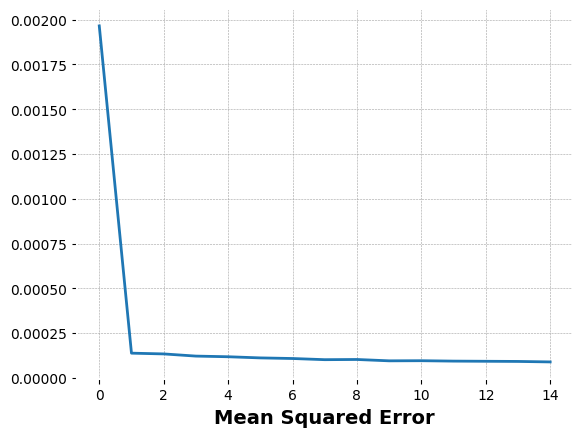

In [106]:
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error', size=14)

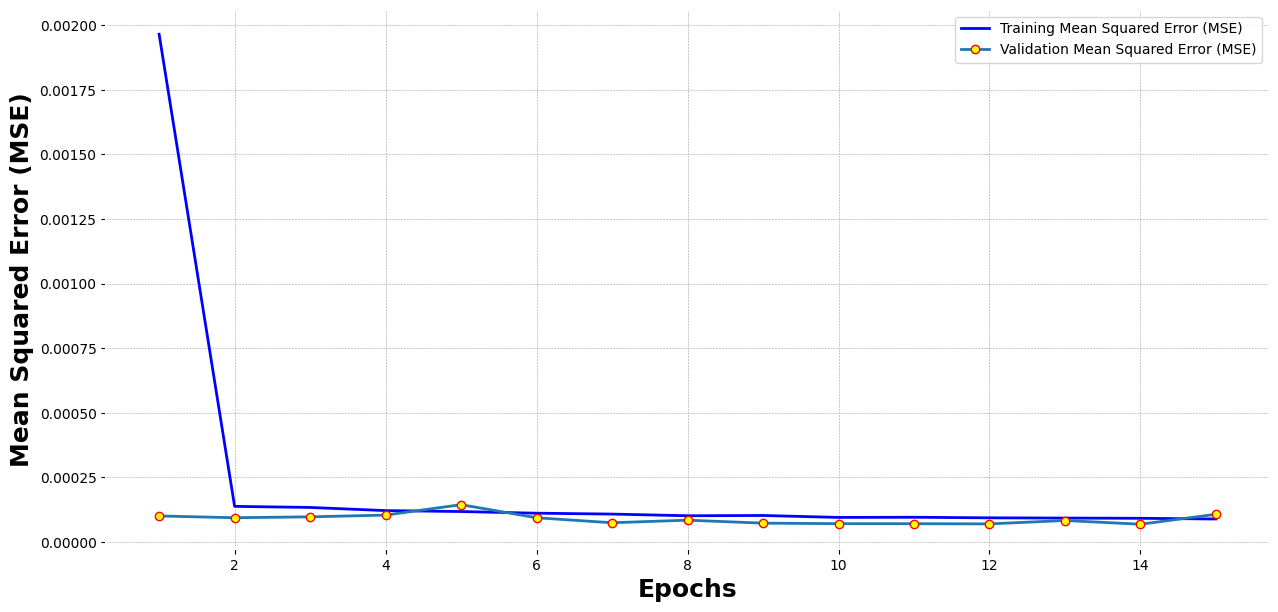

In [107]:
# More detailed MSE graph

history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

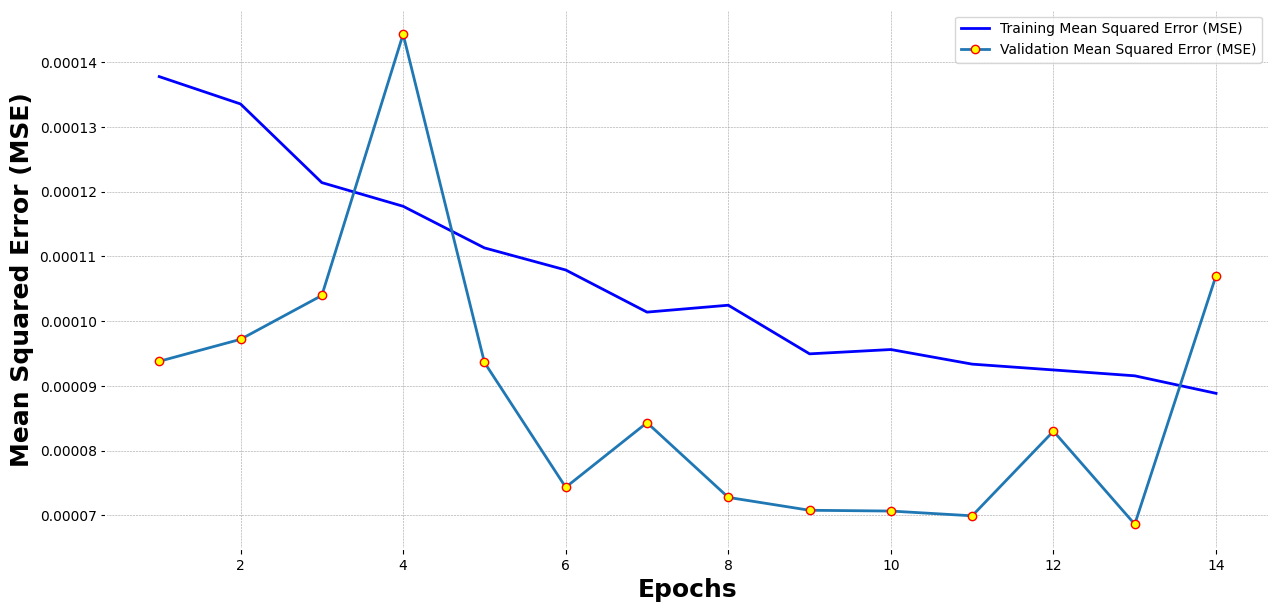

In [108]:
# deleted the 1st epoch
# to examine in detail the results of the remaining epochs

history_dict = history.history

mse_values = history_dict['loss'][1:]
val_mse_values = history_dict['val_loss'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

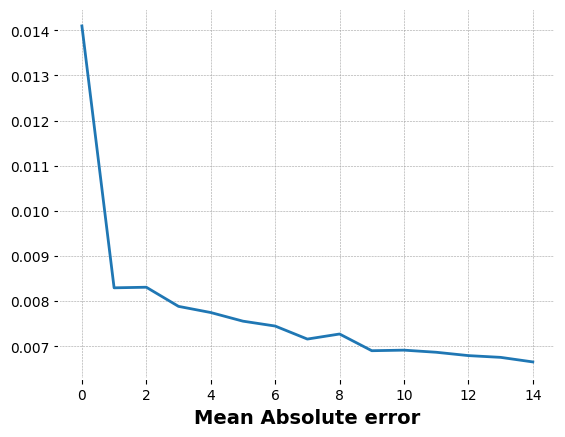

In [109]:
plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error', size=14)
plt.show()

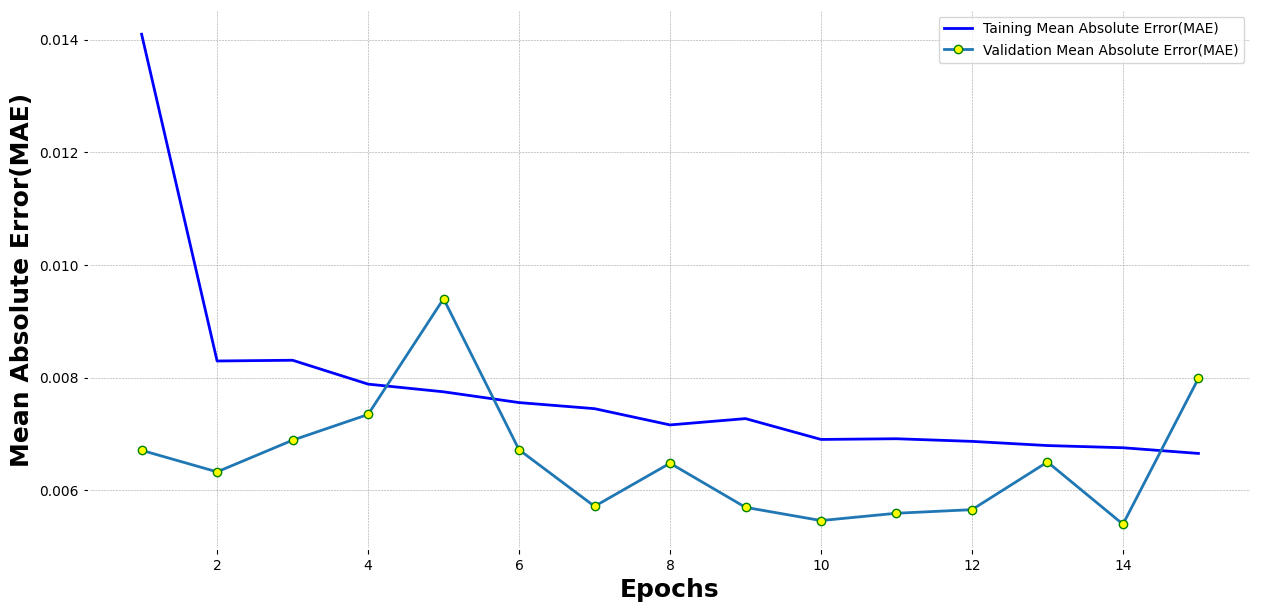

In [110]:
history_dict = history.history

mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mae_values, 'b', label='Taining Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error(MAE)', size=18)
plt.legend()
plt.show()

In [111]:
pred = LSTM_saved_best_model_update(X_test)
print(pred)

tf.Tensor(
[[0.63558286 0.63834584]
 [0.6356106  0.6383594 ]
 [0.63614196 0.6388609 ]
 ...
 [0.58877194 0.59139186]
 [0.588404   0.5910863 ]
 [0.58881205 0.59155214]], shape=(2995, 2), dtype=float32)


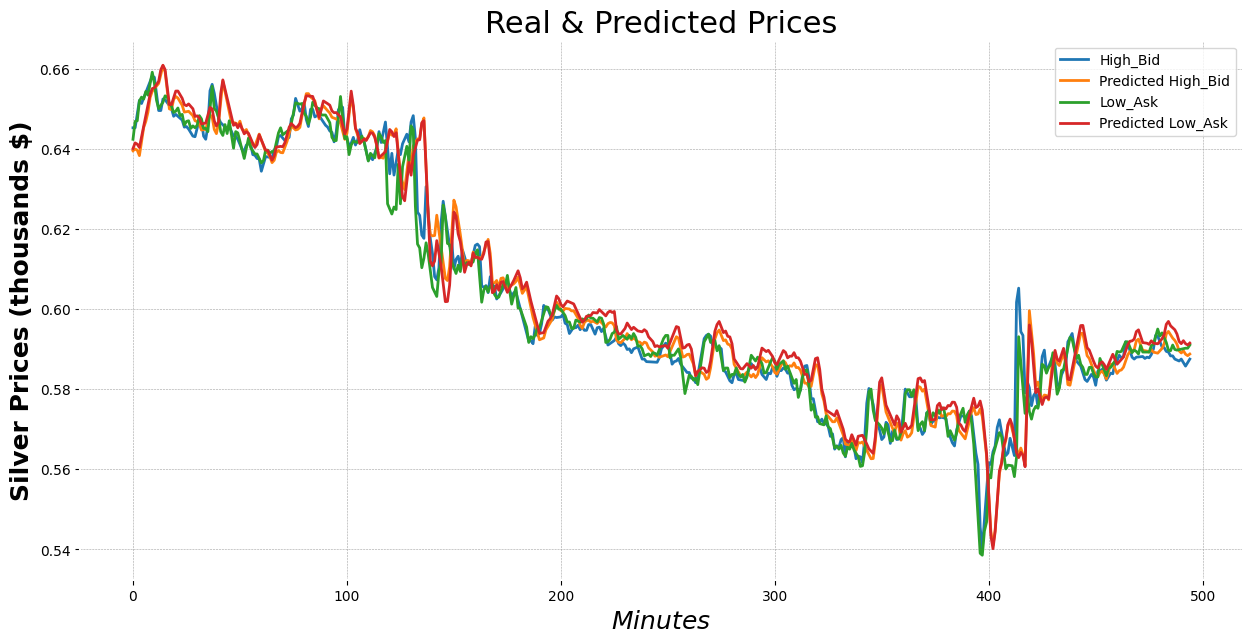

In [112]:
N1=2500  # The first minute for the chart  
LL = 500  # Duration (in minutes) for the chart
N2=N1+LL  # the last minute for the chart

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Prices', size=22)
plt.ylabel('Silver Prices (thousands $)', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()


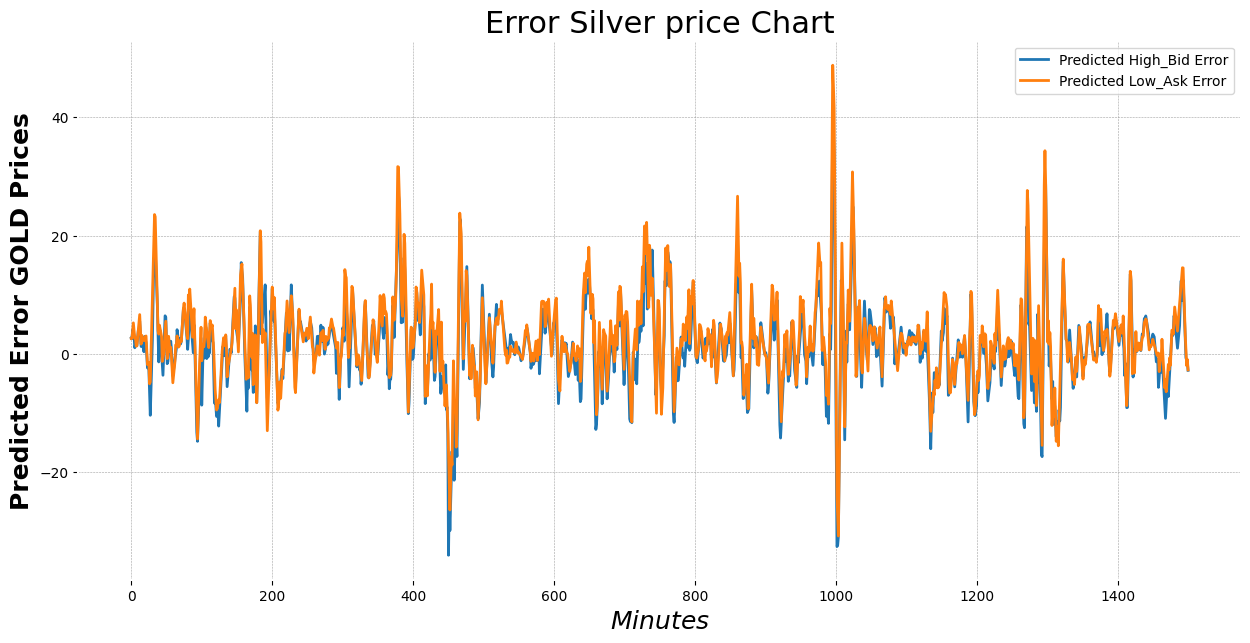

In [113]:
N1=0  # The first minute for the chart  
LL = 1500  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)

# in $ (absolute price)
a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000
b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000

# in %
#a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000/ average_price *100
#b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000/ average_price *100


line1, = ax1.plot(a, label='Predicted High_Bid Error')
line2, = ax1.plot(b, label='Predicted Low_Ask Error')

plt.title('Error Silver price Chart', size=22)
plt.ylabel('Predicted Error GOLD Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()

In [ ]:
data[['High_Delta']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='High_Delta Price Distribution',
    yTitle='Numbers',
    layout=dict(
                            title='High_Delta Price',
                            xaxis=dict(title='High_Delta Price Distribution'),
                            yaxis=dict(title='Numbers')
                            ))

In [ ]:
data[['Low_Delta']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Low_Delta Price Distribution',
    yTitle='Numbers',
    title='Low_Delta Price',
    layout=dict(
    xaxis=dict(title='Low_Delta Price Distribution'),
    yaxis=dict(title='Numbers')
                            ))

In [ ]:
plt.figure(num=1, figsize=(15,7))
plt.hist(data['Open_Delta'], bins=100)
plt.title('Open_Delta price distribution', size=18)
plt.ylabel('Numbers', size=13)
plt.xlabel('Open_Delta price', size=13)
plt.show()

In [ ]:
plt.figure(num=1, figsize=(15,7))
plt.hist(data['Close_Delta'], bins=100)
plt.title('Close_Delta price distribution', size=18)
plt.ylabel('Numbers', size=13)
plt.xlabel('Close_Delta price', size=13)
plt.show()

In [ ]:
plt.figure(num=1, figsize=(12,5))
plt.hist(data['Volume_Delta'], bins=100)
plt.title('Volume_Delta price distribution', size=18)
plt.ylabel('Numbers', size=13)
plt.xlabel('Volume_Delta price', size=13)
plt.show()

In [ ]:
plt.figure(num=1, figsize=(12,5))
plt.hist(data['Volume_Delta_abs'], bins=100)
plt.title('Volume_Delta  ABS distribution', size=18)
plt.ylabel('Numbers', size=13)
plt.xlabel('Volume_Delta_abs', size=13)
plt.show()

In [ ]:
data[['Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta']].iplot(kind='box', yTitle='Delta', layout=dict(
                            title='Deltas',
                            ))

In [ ]:
#Rename the graphs 